# Final project

Using the Breast Cancer Wisconsin (Diagnostic) Data Set, I am aiming to predict whether the cancer is benign or malignant.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

The data set was downloaded from Kaggle:
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Class distribution: 357 benign, 212 malignant

## Step 1 - Loading and cleaning of data

In [130]:
# import dataset downloaded from Kaggle and display first rows
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [131]:
# display type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [132]:
# check for missing values in data
print df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [133]:
# drop column 32 because of missing values
df1 = df.drop('Unnamed: 32', axis=1)
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [134]:
# display column names
df1.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

In [135]:
# drop id column because it is of no use for analysis
df2 = df1.drop('id', axis=1)
df2.columns

Index([u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

In [136]:
# get descriptive statistics of dataset
df2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [137]:
# transform class labels from original string representation ('M' for malignant and 'B' for benign) into integers (1 for malignant and 0 for benign)
from sklearn.preprocessing import LabelEncoder

X = df2.iloc[:, 1:].values
y = df2.iloc[:, 0].values

class_le = LabelEncoder()
y = class_le.fit_transform(df2['diagnosis'].values)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [138]:
X.shape

(569, 30)

In [139]:
y.shape

(569,)

In [140]:
# perform one-hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

/Applications/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.     , 0.     , 0.     , ..., 0.2654 , 0.4601 , 0.1189 ],
       [0.     , 0.     , 0.     , ..., 0.186  , 0.275  , 0.08902],
       [0.     , 0.     , 0.     , ..., 0.243  , 0.3613 , 0.08758],
       ...,
       [0.     , 0.     , 0.     , ..., 0.1418 , 0.2218 , 0.0782 ],
       [0.     , 0.     , 0.     , ..., 0.265  , 0.4087 , 0.124  ],
       [0.     , 1.     , 0.     , ..., 0.     , 0.2871 , 0.07039]])

In [141]:
# split data into training (80% of data) and test set (20% of data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

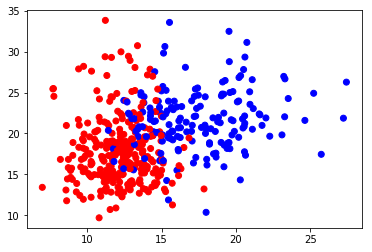

In [142]:
# plot the training set
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright)

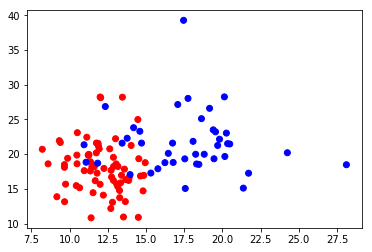

In [143]:
# plot the testing set
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright)

In [144]:
# standardize data (data centered around 0 with standard deviation of 1)
from sklearn import preprocessing
stdscaler = preprocessing.StandardScaler().fit(X_train)
#print "Means of columns: ", stdscaler.mean_, "\nStandard deviation of columns:", stdscaler.scale_

X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled = stdscaler.transform(X_test)

print "Training set samples: ", len(X_train)
print "Testing set samples: ", len(X_test)

Training set samples:  455
Testing set samples:  114


In [145]:
# normalize numerical columns
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train_scaled)
X_test_norm = mms.transform(X_test_scaled)


In [146]:
X_train_norm

array([[0.29008269, 0.2746888 , 0.27070086, ..., 0.28298969, 0.28760103,
        0.09477896],
       [0.34585841, 0.72365145, 0.3325414 , ..., 0.36013746, 0.13502858,
        0.18476978],
       [0.33705171, 0.4560166 , 0.32129131, ..., 0.23522337, 0.13483146,
        0.19598583],
       ...,
       [0.35662214, 0.53278008, 0.34924184, ..., 0.46804124, 0.22333925,
        0.1867375 ],
       [0.61397329, 0.94439834, 0.58842848, ..., 0.55841924, 0.22629608,
        0.13537977],
       [0.28910416, 0.24854772, 0.28153169, ..., 0.34948454, 0.08555096,
        0.10645415]])

## Step 2 - Apply machine learning algorithms to dataset

### 1. Sequential backward selection (SBS) and KNN classifier

In [147]:
# sequential feature selection
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

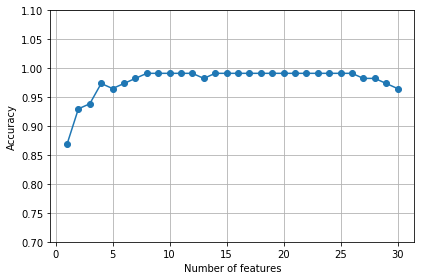

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_scaled, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

In [149]:
# 8 features are suffiecient to yield almost 100% accuracy
k8 = list(sbs.subsets_[22])
print(df2.columns[1:][k8])

Index([u'radius_mean', u'texture_mean', u'smoothness_mean', u'concavity_mean',
       u'symmetry_mean', u'radius_se', u'concavity_se', u'concavity_worst'],
      dtype='object')


In [150]:
# evaluate performance of KNN classifier on original test set
knn.fit(X_train_norm, y_train)
print('Training accuracy:', knn.score(X_train_norm, y_train))
print('Test accuracy:', knn.score(X_test_norm, y_test))

('Training accuracy:', 0.9802197802197802)
('Test accuracy:', 0.9649122807017544)


In [151]:
# evaluate performance of KNN classifier on 8-feature subset
knn.fit(X_train_norm[:, k8], y_train)
print('Training accuracy:', knn.score(X_train_norm[:, k8], y_train))
print('Test accuracy:', knn.score(X_test_norm[:, k8], y_test))

('Training accuracy:', 0.9692307692307692)
('Test accuracy:', 0.956140350877193)


### 2. Assessing feature importance with random forests and applying random forest classifier

 1) concave points_worst          0.126481
 2) perimeter_worst               0.123369
 3) radius_worst                  0.116148
 4) area_worst                    0.112531
 5) concave points_mean           0.105041
 6) concavity_mean                0.053160
 7) area_mean                     0.049476
 8) radius_mean                   0.042389
 9) perimeter_mean                0.039387
10) concavity_worst               0.034959
11) area_se                       0.028942
12) texture_mean                  0.017524
13) texture_worst                 0.016851
14) compactness_worst             0.013924
15) compactness_mean              0.013916
16) radius_se                     0.013411
17) smoothness_worst              0.012795
18) symmetry_worst                0.011638
19) perimeter_se                  0.011281
20) fractal_dimension_worst       0.007911
21) concavity_se                  0.006688
22) texture_se                    0.006551
23) smoothness_mean               0.006161
24) symmetr

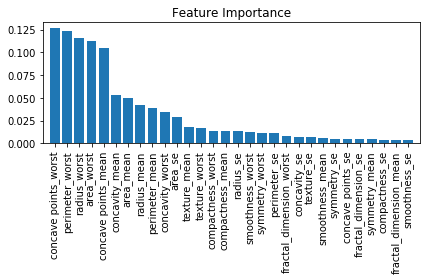

In [152]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df2.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# don´t need standardized or normalize features
forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances) [::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s%f" % (f + 1, 30, 
                          feat_labels[indices[f]],
                          importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')

plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [156]:
# Random forest on original data set
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier 
clf_rf = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state=1, n_jobs = 2)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
cm


('Accuracy is: ', 0.9707602339181286)


array([[106,   2],
       [  3,  60]])

### 3. Linear Discriminant analysis

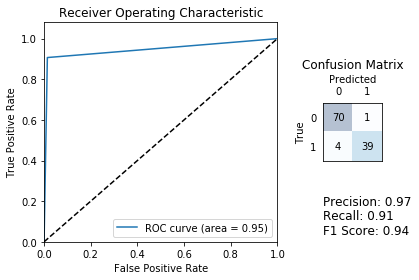

In [154]:
# Linear discriminant analysis on original data
from mlclass2 import simplemetrics, plot_decision_2d_lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predicted = lda.predict(X_test)
simplemetrics(y_test,predicted)

### 4. Support vector machine

In [155]:
# Support vector machine
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import hinge_loss
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
print classification_report(y_test,predicted)
print "Hinge loss", hinge_loss(y_test,predicted)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Hinge loss 0.6666666666666666
